In [1]:

# Import the relevant Python libraries.
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4_Abhishek').getOrCreate()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pyspark.sql.functions as F



# Firsht installed pip on python to import seaborn*****NOTE

# sudo apt-get install -y python3-dev python3-setuptools
#sudo apt-get update
#sudo apt-get install python3-pip
#pip3 install -U pip
#pip install seaborn --user
import seaborn as sns



# Let's read in the data.
air_data = spark.read.csv('./data.csv', header = True,inferSchema=True)

# The show method allows us to visualise DataFrames.
air_data.show(10)

# Let's have a look at the column names. 
columns = air_data.columns
columns

# Select a list of relevant columns. 
air_data = air_data.drop("stn_code","agency","sampling_date","location_monitoring_station")
#air_data = air_data.select(air_data.state.cast("String"))
#air_data.printSchema()

   # Let's import in the relevant types.


+--------+------------------+--------------+---------+------+--------------------+----+-----+----+----+---------------------------+-----+--------+
|stn_code|     sampling_date|         state| location|agency|                type| so2|  no2|rspm| spm|location_monitoring_station|pm2_5|    date|
+--------+------------------+--------------+---------+------+--------------------+----+-----+----+----+---------------------------+-----+--------+
|     150|February - M021990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...|4.80|17.40|null|null|                         NA| null|2/1/1990|
|     151|February - M021990|Andhra Pradesh|Hyderabad|    NA|     Industrial Area|3.10| 7.00|null|null|                         NA| null|2/1/1990|
|     152|February - M021990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...|6.20|28.50|null|null|                         NA| null|2/1/1990|
|     150|   March - M031990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...|6.30|14.70|null|null|               

In [4]:
from pyspark.sql.types import (StructField,StringType,IntegerType,DateType,ShortType,DoubleType,StructType)

# Then create a variable with the correct structure.
air_data2 = air_data.select(air_data.state,air_data.type,air_data.location,air_data.so2.cast("Integer"),air_data.no2.cast("Integer"),air_data.spm.cast("Integer"),
                            air_data.rspm.cast("Integer"),air_data.pm2_5.cast("Integer"),air_data.date.cast("Date"))
#airdata2=airdata.select(air_data2.Date)
air_data2.printSchema()

air_data2.limit(5941).toPandas()


root
 |-- state: string (nullable = true)
 |-- type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- so2: integer (nullable = true)
 |-- no2: integer (nullable = true)
 |-- spm: integer (nullable = true)
 |-- rspm: integer (nullable = true)
 |-- pm2_5: integer (nullable = true)
 |-- date: date (nullable = true)



,state,type,location,so2,no2,spm,rspm,pm2_5,date
0,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,4.0,17.0,NaN,NaN,None,None
1,Andhra Pradesh,Industrial Area,Hyderabad,3.0,7.0,NaN,NaN,None,None
2,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6.0,28.0,NaN,NaN,None,None
3,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6.0,14.0,NaN,NaN,None,None
4,Andhra Pradesh,Industrial Area,Hyderabad,4.0,7.0,NaN,NaN,None,None
5,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6.0,25.0,NaN,NaN,None,None
6,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,5.0,17.0,NaN,NaN,None,None
7,Andhra Pradesh,Industrial Area,Hyderabad,4.0,8.0,NaN,NaN,None,None
8,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,4.0,23.0,NaN,NaN,None,None
9,Andhra Pradesh,Industrial Area,Hyderabad,4.0,8.0,NaN,NaN,None,None


In [9]:
from random import randint

finalairdata=air_data2.na.fill(randint(1,10),subset=['spm','rspm','so2','no2','pm2_5'])
#finalairdata=air_data2.na.fill('Nodate',subset=['date'])
finalairdata.show(500)
for item in finalairdata.columns:
    nullCount=finalairdata.where(F.col(item).isNull()).count()
    print("Number of null values for " + item + " = %g" % nullCount)

+--------------+--------------------+--------------+---+---+---+----+-----+----+
|         state|                type|      location|so2|no2|spm|rspm|pm2_5|date|
+--------------+--------------------+--------------+---+---+---+----+-----+----+
|Andhra Pradesh|Residential, Rura...|     Hyderabad|  4| 17| 10|  10|   10|null|
|Andhra Pradesh|     Industrial Area|     Hyderabad|  3|  7| 10|  10|   10|null|
|Andhra Pradesh|Residential, Rura...|     Hyderabad|  6| 28| 10|  10|   10|null|
|Andhra Pradesh|Residential, Rura...|     Hyderabad|  6| 14| 10|  10|   10|null|
|Andhra Pradesh|     Industrial Area|     Hyderabad|  4|  7| 10|  10|   10|null|
|Andhra Pradesh|Residential, Rura...|     Hyderabad|  6| 25| 10|  10|   10|null|
|Andhra Pradesh|Residential, Rura...|     Hyderabad|  5| 17| 10|  10|   10|null|
|Andhra Pradesh|     Industrial Area|     Hyderabad|  4|  8| 10|  10|   10|null|
|Andhra Pradesh|Residential, Rura...|     Hyderabad|  4| 23| 10|  10|   10|null|
|Andhra Pradesh|     Industr

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


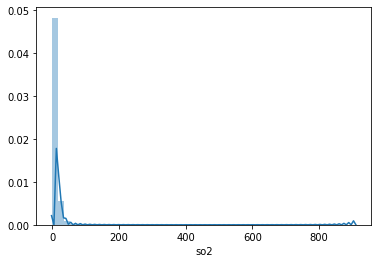

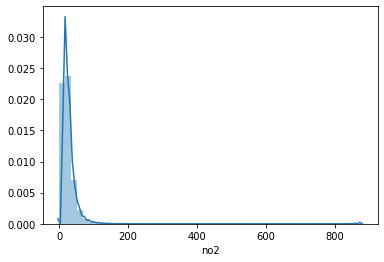

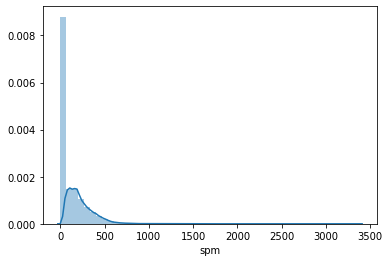

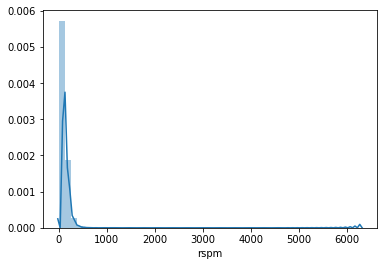

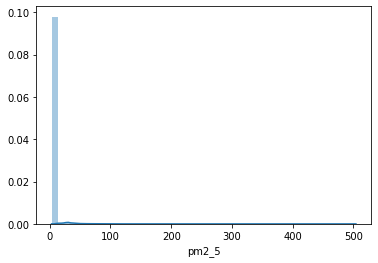

In [10]:
#Distribution of the data 

data_plot= finalairdata.select('so2','no2','spm','rspm','pm2_5','state','type').sample(False, 0.95).toPandas()
data_plot= data_plot.dropna()
sns.distplot(data_plot.so2)
plt.show()
sns.distplot(data_plot.no2)
plt.show()
sns.distplot(data_plot.spm)
plt.show()
sns.distplot(data_plot.rspm)
plt.show()
sns.distplot(data_plot.pm2_5)
plt.show()
#sns.distplot(data_plot.state)
#plt.show()


In [11]:
# Type conversion
# Select a list of relevant columns we dont need date we droped date here. 
my_cols = finalairdata.select([
 'state',
'so2',
 'no2',
 'rspm',
 'spm',
 'pm2_5',
 'type',
 ])
air_quality=my_cols

# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
type_indexer = StringIndexer(inputCol='type',outputCol='typeIndex').fit(air_quality)
air_quality= type_indexer.transform(air_quality)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
air_quality = OneHotEncoder(inputCol='typeIndex',outputCol='typeVec').transform(air_quality)

# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
type_indexer = StringIndexer(inputCol='state',outputCol='stateIndex').fit(air_quality)
air_quality= type_indexer.transform(air_quality)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
air_quality = OneHotEncoder(inputCol='stateIndex',outputCol='stateVec').transform(air_quality)


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


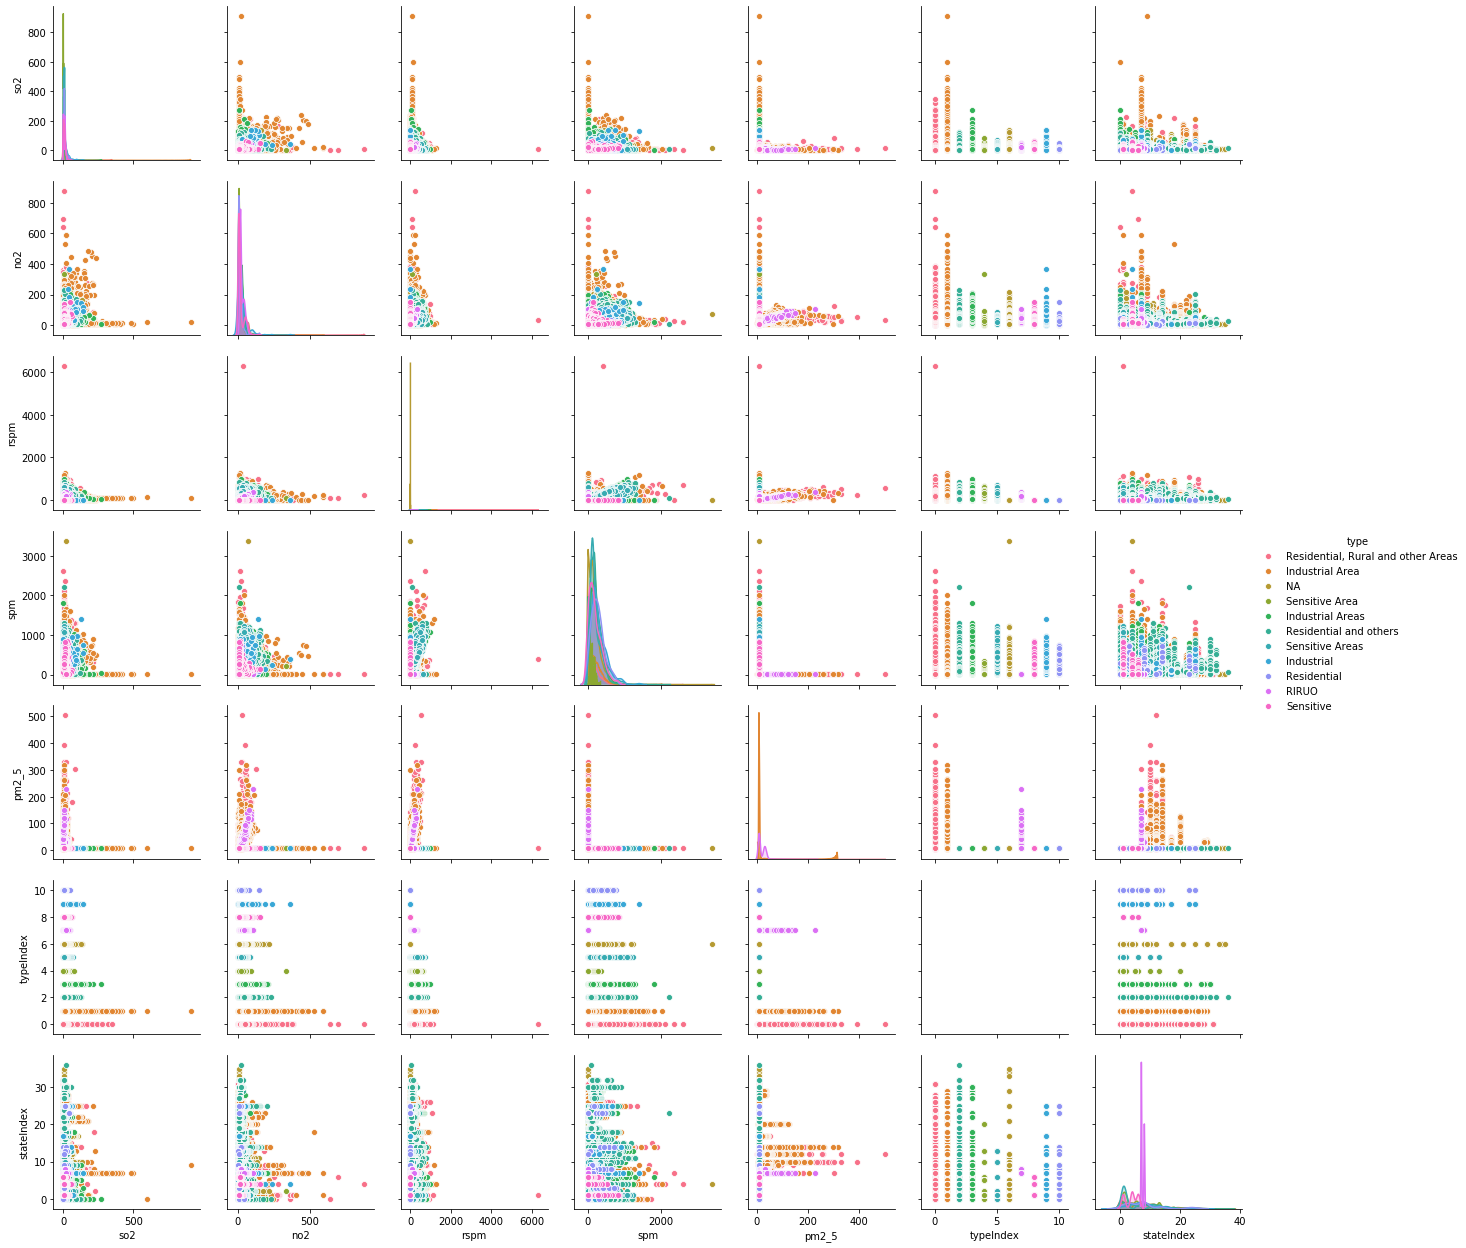

In [57]:
#pairplot of the variable according to Types
sns.pairplot(air_quality.sample(False, 0.95).toPandas(), hue = "type")

In [12]:
# The input columns are the feature columns names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=[
     'so2',
     'typeVec',
     'no2',
     'spm',
     'pm2_5',
     'stateVec'],
    outputCol="patterns")

#randomly split data into training and test dataset
(train_data, test_data) = air_quality.randomSplit([0.7, 0.3], seed = 111)

In [13]:
#Linear Regression Starts from here




lr_train_data = assembler.transform(train_data)
lr_test_data = assembler.transform(test_data)
lr_train_data .show(5000)

+--------------+---+---+----+---+-----+--------------------+---------+--------------+----------+--------------+--------------------+
|         state|so2|no2|rspm|spm|pm2_5|                type|typeIndex|       typeVec|stateIndex|      stateVec|            patterns|
+--------------+---+---+----+---+-----+--------------------+---------+--------------+----------+--------------+--------------------+
|Andhra Pradesh|  0|  2|  10| 10|   10|                  NA|      6.0|(10,[6],[1.0])|       2.0|(36,[2],[1.0])|(50,[7,11,12,13,1...|
|Andhra Pradesh|  0|  2|  10| 10|   10|                  NA|      6.0|(10,[6],[1.0])|       2.0|(36,[2],[1.0])|(50,[7,11,12,13,1...|
|Andhra Pradesh|  0| 16|  10| 10|   10|                  NA|      6.0|(10,[6],[1.0])|       2.0|(36,[2],[1.0])|(50,[7,11,12,13,1...|
|Andhra Pradesh|  1|  3|  10| 10|   10|                  NA|      6.0|(10,[6],[1.0])|       2.0|(36,[2],[1.0])|(50,[0,7,11,12,13...|
|Andhra Pradesh|  1|  4|  10| 10|   10|                  NA|      6.0

In [14]:
# importing LinearRegression
from pyspark.ml.regression import LinearRegression

In [19]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?


lr = LinearRegression(featuresCol='patterns', labelCol='pm2_5'# Let's evaluate the model against the test data.
lr_test_results = lrModel.evaluate(lr_test_data)', predictionCol='prediction')

# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(lr_train_data)

# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-2.303519661841499e-08,-3.810446458761022e-05,-3.746399787268445e-05,-3.9650492772129005e-05,-3.828107305261908e-05,-3.865835412973329e-05,-3.784611474491357e-05,-3.7601247824252386e-05,-3.1321280027279726e-05,-4.136239485412494e-05,-3.404854368729204e-05,3.913861899548482e-09,-4.785154513630434e-09,0.9999999660943071,9.184265532678493e-07,-2.699620246912352e-07,-9.596066444307216e-07,-2.2877354408463801e-07,-5.817920011478595e-07,-8.004826367691813e-07,-1.2407248749983686e-06,1.2177433448358366e-06,4.771972987608812e-07,3.2458174391546064e-07,-4.687437736645717e-08,4.0487915047312515e-08,-5.3053057960343675e-08,-1.1753364601470198e-06,2.9842327462161293e-07,-4.819700076902497e-07,5.547590752833924e-08,2.4417175331303167e-07,1.6338202067643589e-06,1.986743040889509e-10,2.2451332456233567e-09,1.3467265707945173e-06,3.6654142253814615e-07,5.928394240638542e-07,-1.549374847773317e-07,3.1677476585188437e-06,2.3396560805249742e-06,7.465466795059554e-07,-8.957783433071047e-07,

In [20]:
# Let's evaluate the model against the test data.
lr_train_results = lrModel.evaluate(lr_train_data)
# Interesting results! This shows the difference between the predicted value and the test data.
lr_train_results.residuals.show(10)

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Absolute Error (mae) on train data: {}".format(lr_train_results.meanAbsoluteError))

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Squared Error (mse) on train data: {}".format(lr_train_results.meanSquaredError))


# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Root Mean Squared Error (rmse) on train data: {}".format(lr_train_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R Squared (R2) on train data: {}".format(lr_train_results.r2))

+--------------------+
|           residuals|
+--------------------+
|-3.28706638796916...|
|-3.28706638796916...|
|-3.83500706746531...|
|-3.09585304947290...|
|-3.13499166182396...|
|-3.13499166182396...|
|-3.21326890428963...|
|-3.21326890428963...|
|-3.64379371120548...|
|2.301748125432823E-9|
+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data: 1.1543995135190833e-06
Mean Squared Error (mse) on train data: 2.741896523642264e-12
Root Mean Squared Error (rmse) on train data: 1.6558673025463918e-06
R Squared (R2) on train data: 0.9999999999999296


In [21]:
# Let's evaluate the model against the test data.
lr_test_results = lrModel.evaluate(lr_test_data)
# Interesting results! This shows the difference between the predicted value and the test data.
lr_test_results.residuals.show(10)

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Absolute Error (mae) on test data: {}".format(lr_test_results.meanAbsoluteError))

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Squared Error (mse) on test data: {}".format(lr_test_results.meanSquaredError))


# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Root Mean Squared Error (rmse) on test data: {}".format(lr_test_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R Squared (R2) on test data: {}".format(lr_test_results.r2))

+--------------------+
|           residuals|
+--------------------+
|-3.13499166182396...|
|-3.56551646873981...|
|-4.94304668308132E-8|
|-3.64379371120548...|
|-1.92099898654873...|
|1.141072768717776...|
|2.088389319254702E-7|
|-4.31627784180932...|
|2.088389319254702E-7|
|2.088389319254702E-7|
+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data: 1.1488722832417128e-06
Mean Squared Error (mse) on test data: 2.5416812595541054e-12
Root Mean Squared Error (rmse) on test data: 1.5942651158305212e-06
R Squared (R2) on test data: 0.9999999999999408


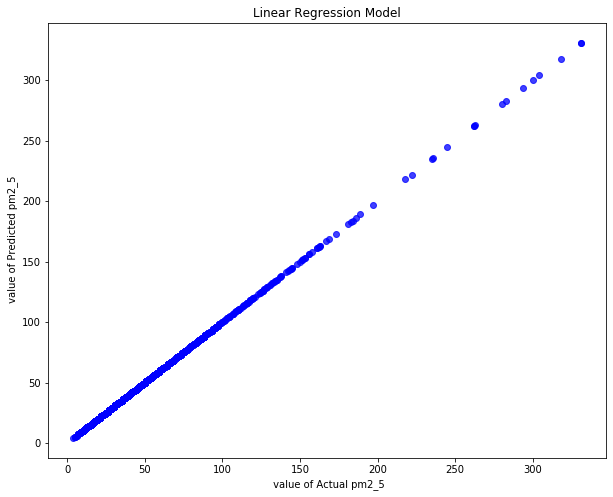

In [22]:
#view this relationship between predictions and actual_values graphically with a scatter plot.

lr_PriceArr = np.array(lr_test_results.predictions.select('pm2_5').collect())
lr_PredictionArr = np.array(lr_test_results.predictions.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(lr_PriceArr,lr_PredictionArr, alpha=.75,
            color='b')  # alpha helps to show overlapping data
 
plt.xlabel(' value of Actual pm2_5')
plt.ylabel(' value of Predicted pm2_5')
plt.title('Linear Regression Model')

plt.show()

In [23]:
# Random forest Regression start from here
#importing Random Forest Regression
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics# Useing the model on train data to view the result of the model on train data


#rf_train_results = rf_model.transform(train_data)
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [24]:
# train RandomForest model
rf = RandomForestRegressor(labelCol="pm2_5", featuresCol="patterns", predictionCol = "prediction")

rf_pipeline = Pipeline(stages=[assembler, rf])

In [25]:
# creating the Random forest model
rf_model = rf_pipeline.fit(train_data)

# Useing the model on train data to view the result of the model on train data

rf_train_results = rf_model.transform(train_data)

# Let's have a look into the predictions on the traindata from model.
rf_train_results.select('pm2_5','prediction', 'patterns').show(10)


rf_evaluator = RegressionEvaluator(labelCol = "pm2_5")
print("Mean Absolute Error (mae) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "r2"}))

+-----+------------------+--------------------+
|pm2_5|        prediction|            patterns|
+-----+------------------+--------------------+
|   10|10.217939070550376|(50,[7,11,12,13,1...|
|   10|10.217939070550376|(50,[7,11,12,13,1...|
|   10|10.217524241463044|(50,[7,11,12,13,1...|
|   10|10.217939070550376|(50,[0,7,11,12,13...|
|   10|10.217939070550376|(50,[0,7,11,12,13...|
|   10|10.217939070550376|(50,[0,7,11,12,13...|
|   10|10.217939070550376|(50,[0,7,11,12,13...|
|   10|10.217939070550376|(50,[0,7,11,12,13...|
|   10|10.217524241463044|(50,[0,7,11,12,13...|
|   10| 10.02931190716845|(50,[0,7,11,12,13...|
+-----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 0.372514
Mean Squared Error (mse) on train data = 8.36298
Root Mean Squared Error (rmse) on train data = 2.89188
R Squared (R2) on train data = 0.785203


In [26]:
# Make predictions on test data
rf_test_results = rf_model.transform(test_data)

# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_test_results.select('pm2_5','prediction', 'patterns').show(10)



rf_evaluator = RegressionEvaluator(labelCol = "pm2_5")
print("Mean Absolute Error (mae) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "r2"}))

+-----+------------------+--------------------+
|pm2_5|        prediction|            patterns|
+-----+------------------+--------------------+
|   10|10.217939070550376|(50,[0,7,11,12,13...|
|   10|10.217524241463044|(50,[0,7,11,12,13...|
|   10|10.028897078081119|(50,[0,7,11,12,13...|
|   10|10.217524241463044|(50,[0,7,11,12,13...|
|   10|10.028897078081119|(50,[0,7,11,12,13...|
|   10|10.039346259580782|(50,[0,1,11,12,13...|
|   10|10.179673101763564|(50,[0,1,11,12,13...|
|   10|10.170343873565166|(50,[0,2,11,12,13...|
|   10|10.179673101763564|(50,[0,1,11,12,13...|
|   10|10.179673101763564|(50,[0,1,11,12,13...|
+-----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 0.386087
Mean Squared Error (mse) on test data = 10.2532
Root Mean Squared Error (rmse) on test data = 3.20207
R Squared (R2) on test data = 0.761183


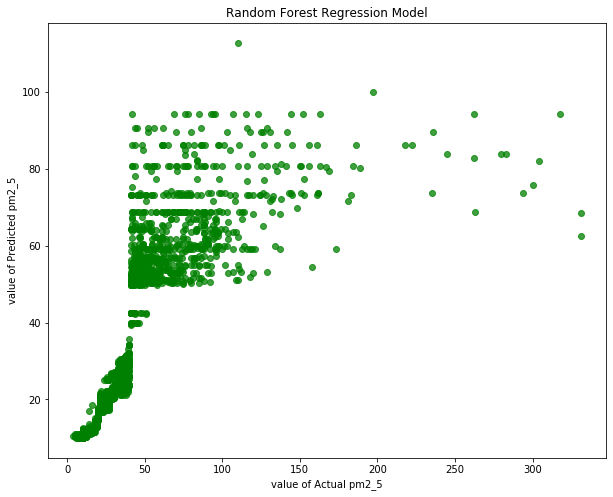

In [27]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_PriceArr = np.array(rf_test_results.select('pm2_5').collect())
rf_PredictionArr = np.array(rf_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_PriceArr,rf_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('value of Actual pm2_5')
plt.ylabel('value of Predicted pm2_5')
plt.title('Random Forest Regression Model')

plt.show()

In [28]:
# Evaluate model
rf_cv_evaluator = RegressionEvaluator(metricName="rmse", labelCol=rf.getLabelCol(), predictionCol=rf.getPredictionCol())

# Create ParamGrid for Cross Validation
rf_paramGrid = (ParamGridBuilder()
             #.addGrid(rf.maxDepth, [2, 5, 10, 20, 30])
               .addGrid(rf.maxDepth, [2, 5])
             #.addGrid(rf.maxBins, [10, 20, 40, 80, 100])
               .addGrid(rf.maxBins, [10, 20, 40])
             #.addGrid(rf.numTrees, [5, 20, 50, 100, 500])
               .addGrid(rf.numTrees, [10, 100])
             .build())

# Create 5-fold CrossValidator
rf_cv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rf_paramGrid,
                      evaluator = rf_cv_evaluator,
                      numFolds = 5)
# creating the pipeline with cross validator and features
rf_cv_pipeline = Pipeline(stages=[assembler, rf_cv])

In [29]:
# fitting the train data 
rf_cv_pipelineModel = rf_cv_pipeline.fit(train_data)
# Useing the model on train data to view the result of the model on train data

rf_cv_train_results = rf_cv_pipelineModel.transform(train_data)

# Let's have a look into the predictions on the traindata from model.
rf_cv_train_results.select('pm2_5','prediction', 'patterns').show(10)


rf_cv_evaluator = RegressionEvaluator(labelCol = "pm2_5")
print("Mean Absolute Error (mae) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "r2"}))

+-----+------------------+--------------------+
|pm2_5|        prediction|            patterns|
+-----+------------------+--------------------+
|   10|10.129182179394753|(50,[7,11,12,13,1...|
|   10|10.129182179394753|(50,[7,11,12,13,1...|
|   10| 10.13671871204938|(50,[7,11,12,13,1...|
|   10|10.129182179394753|(50,[0,7,11,12,13...|
|   10|10.129182179394753|(50,[0,7,11,12,13...|
|   10|10.129182179394753|(50,[0,7,11,12,13...|
|   10|10.129182179394753|(50,[0,7,11,12,13...|
|   10|10.129182179394753|(50,[0,7,11,12,13...|
|   10| 10.13671871204938|(50,[0,7,11,12,13...|
|   10|10.026326552551465|(50,[0,7,11,12,13...|
+-----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 0.290512
Mean Squared Error (mse) on train data = 6.53032
Root Mean Squared Error (rmse) on train data = 2.55545
R Squared (R2) on train data = 0.832273


In [30]:
# Use test set here so we can measure the accuracy of our model on new data

rf_cv_test_results = rf_cv_pipelineModel.transform(test_data)


# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_cv_test_results.select('pm2_5','prediction', 'patterns').show(10)


rf_cv_evaluator = RegressionEvaluator(labelCol = "pm2_5")
print("Mean Absolute Error (mae) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "r2"}))

+-----+------------------+--------------------+
|pm2_5|        prediction|            patterns|
+-----+------------------+--------------------+
|   10|10.129182179394753|(50,[0,7,11,12,13...|
|   10| 10.13515685400026|(50,[0,7,11,12,13...|
|   10|10.033180713946916|(50,[0,7,11,12,13...|
|   10| 10.13671871204938|(50,[0,7,11,12,13...|
|   10|10.033116382030238|(50,[0,7,11,12,13...|
|   10|10.032712281208353|(50,[0,1,11,12,13...|
|   10|10.135567908051641|(50,[0,1,11,12,13...|
|   10|10.132957627621012|(50,[0,2,11,12,13...|
|   10|10.135567908051641|(50,[0,1,11,12,13...|
|   10|10.135567908051641|(50,[0,1,11,12,13...|
+-----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 0.306014
Mean Squared Error (mse) on test data = 8.33981
Root Mean Squared Error (rmse) on test data = 2.88787
R Squared (R2) on test data = 0.80575


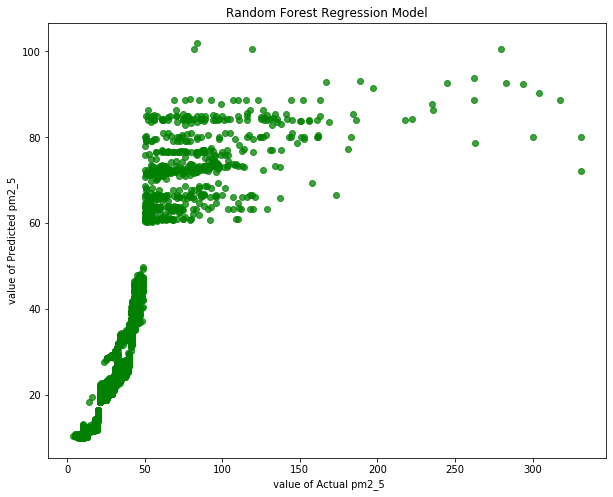

In [31]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_cv_PriceArr = np.array(rf_cv_test_results.select('pm2_5').collect())
rf_cv_PredictionArr = np.array(rf_cv_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_cv_PriceArr,rf_cv_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel(' value of Actual pm2_5')
plt.ylabel('value of Predicted pm2_5')
plt.title('Random Forest Regression Model')

plt.show()

In [32]:
# Gradient Boosting Tree Regression starts here

from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [33]:
# train GB model
gbr = GBTRegressor(labelCol="pm2_5", featuresCol="patterns", predictionCol = "prediction")

gbr_pipeline = Pipeline(stages=[assembler, gbr])

#Creating the model for Gradient Boosting Tree Regression

gbr_model = gbr_pipeline.fit(train_data)
# Useing the model on train data to view the result of the model on train data

gbr_train_results = gbr_model.transform(train_data)


In [34]:
# Let's have a look into the predictions on the traindata from model.
gbr_train_results.select('pm2_5','prediction', 'patterns').show(10)


gbr_evaluator = RegressionEvaluator(labelCol = "pm2_5")
print("Mean Absolute Error (mae) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator.metricName: "r2"}))



+-----+------------------+--------------------+
|pm2_5|        prediction|            patterns|
+-----+------------------+--------------------+
|   10|10.000156777857558|(50,[7,11,12,13,1...|
|   10|10.000156777857558|(50,[7,11,12,13,1...|
|   10|10.000156777857558|(50,[7,11,12,13,1...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
+-----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 0.0859727
Mean Squared Error (mse) on train data = 2.59883
Root Mean Squared Error (rmse) on train data = 1.61209
R Squared (R2) on train data = 0.933251


In [35]:
# Make predictions on test data
gbr_test_results = gbr_model.transform(test_data)

# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_test_results.select('pm2_5','prediction', 'patterns').show(10)


gbr_evaluator = RegressionEvaluator(labelCol = "pm2_5")
print("Mean Absolute Error (mae) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "r2"}))



+-----+------------------+--------------------+
|pm2_5|        prediction|            patterns|
+-----+------------------+--------------------+
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,7,11,12,13...|
|   10|10.000156777857558|(50,[0,1,11,12,13...|
|   10|10.000156777857558|(50,[0,1,11,12,13...|
|   10|10.000156777857558|(50,[0,2,11,12,13...|
|   10|10.000156777857558|(50,[0,1,11,12,13...|
|   10|10.000156777857558|(50,[0,1,11,12,13...|
+-----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 0.102548
Mean Squared Error (mse) on test data = 4.7155
Root Mean Squared Error (rmse) on test data = 2.17152
R Squared (R2) on test data = 0.890167


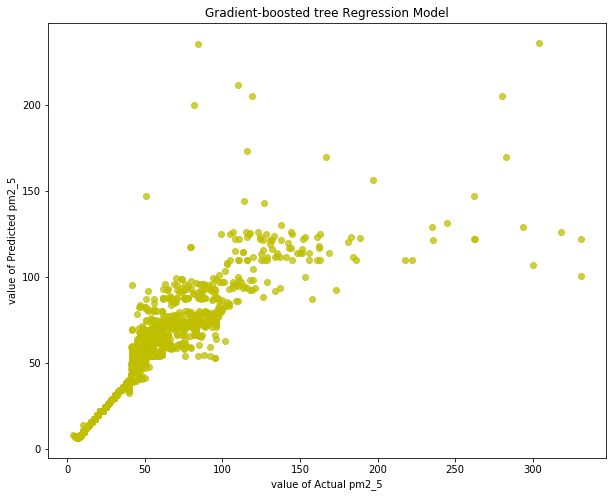

In [36]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_PriceArr = np.array(gbr_test_results.select('pm2_5').collect())
gbr_PredictionArr = np.array(gbr_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_PriceArr,gbr_PredictionArr, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('value of Actual pm2_5')
plt.ylabel('value of Predicted pm2_5')
plt.title('Gradient-boosted tree Regression Model')

plt.show()


In [37]:
# Define a grid of hyperparameters to test:
#  - maxDepth: max depth of each decision tree in the GBT ensemble
#  - maxIter: iterations, i.e., number of trees in each GBT ensemble
# In this example notebook, we keep these values small.
#In practice, to get the highest accuracy, we would likely want to try deeper trees (10 or higher) and 
#more trees in the ensemble (>100).
gbr_paramGrid = ParamGridBuilder()\
  .addGrid(gbr.maxDepth, [2, 5])\
  .addGrid(gbr.maxIter, [10, 100])\
  .build()
# We define an evaluation metric.  
#This tells CrossValidator how well we are doing by comparing the true labels with predictions.
gbr_cv_evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbr.getLabelCol(), predictionCol=gbr.getPredictionCol())
# Declare the CrossValidator, which runs model tuning for us.
gbr_cv = CrossValidator(estimator=gbr, evaluator=gbr_cv_evaluator, estimatorParamMaps=gbr_paramGrid)
#creating pipeline with the features and model
gbr_cv_pipeline = Pipeline(stages=[assembler, gbr_cv])

# fitting the train data and transforming the test data

gbr_cv_pipelineModel = gbr_cv_pipeline.fit(train_data)


In [38]:
# Useing the model on train data to view the result of the model on train data

gbr_cv_train_results = gbr_cv_pipelineModel.transform(train_data)

gbr_cv_train_results.select('pm2_5','prediction', 'patterns').show(10)

gbr_cv_evaluator = RegressionEvaluator(labelCol = "pm2_5")
print("Mean Absolute Error (mae) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator.metricName: "r2"}))


+-----+-----------------+--------------------+
|pm2_5|       prediction|            patterns|
+-----+-----------------+--------------------+
|   10|10.00074846206136|(50,[7,11,12,13,1...|
|   10|10.00074846206136|(50,[7,11,12,13,1...|
|   10|10.00074846206136|(50,[7,11,12,13,1...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
+-----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 0.0536903
Mean Squared Error (mse) on train data = 1.14177
Root Mean Squared Error (rmse) on train data = 1.06854
R Squared (R2) on train data = 0.970675


In [39]:
# using the model to get prediction on test data
gbr_cv_test_results = gbr_cv_pipelineModel.transform(test_data)


# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_cv_test_results.select('pm2_5','prediction', 'patterns').show(10)

gbr_cv_evaluator = RegressionEvaluator(labelCol = "pm2_5")
print("Mean Absolute Error (mae) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "r2"}))

+-----+-----------------+--------------------+
|pm2_5|       prediction|            patterns|
+-----+-----------------+--------------------+
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,7,11,12,13...|
|   10|10.00074846206136|(50,[0,1,11,12,13...|
|   10|10.00074846206136|(50,[0,1,11,12,13...|
|   10|10.00074846206136|(50,[0,2,11,12,13...|
|   10|10.00074846206136|(50,[0,1,11,12,13...|
|   10|10.00074846206136|(50,[0,1,11,12,13...|
+-----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 0.0604843
Mean Squared Error (mse) on test data = 1.74223
Root Mean Squared Error (rmse) on test data = 1.31993
R Squared (R2) on test data = 0.95942


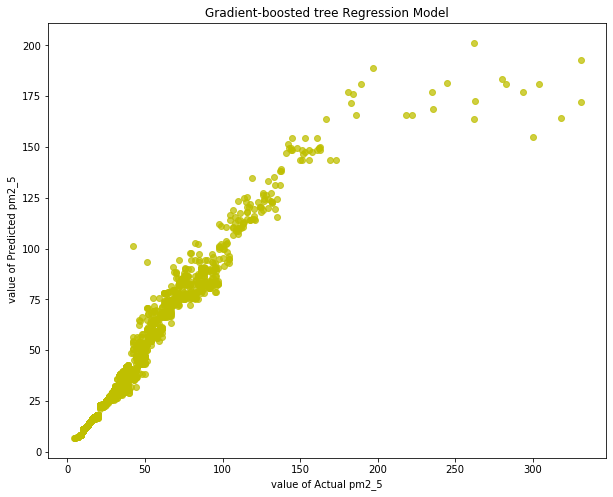

In [40]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_cv_PriceArr = np.array(gbr_cv_test_results.select('pm2_5').collect())
gbr_cv_PredictionArr = np.array(gbr_cv_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_cv_PriceArr,gbr_cv_PredictionArr, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('value of Actual pm2_5')
plt.ylabel(' value of Predicted pm2_5')
plt.title('Gradient-boosted tree Regression Model')

plt.show()


In [41]:
# Re-RUN for RSPM with chenge in Data.


# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?


lr = LinearRegression(featuresCol='patterns', labelCol='rspm', predictionCol='prediction')

In [42]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-2.303519661841499e-08,-3.810446458761022e-05,-3.746399787268445e-05,-3.9650492772129005e-05,-3.828107305261908e-05,-3.865835412973329e-05,-3.784611474491357e-05,-3.7601247824252386e-05,-3.1321280027279726e-05,-4.136239485412494e-05,-3.404854368729204e-05,3.913861899548482e-09,-4.785154513630434e-09,0.9999999660943071,9.184265532678493e-07,-2.699620246912352e-07,-9.596066444307216e-07,-2.2877354408463801e-07,-5.817920011478595e-07,-8.004826367691813e-07,-1.2407248749983686e-06,1.2177433448358366e-06,4.771972987608812e-07,3.2458174391546064e-07,-4.687437736645717e-08,4.0487915047312515e-08,-5.3053057960343675e-08,-1.1753364601470198e-06,2.9842327462161293e-07,-4.819700076902497e-07,5.547590752833924e-08,2.4417175331303167e-07,1.6338202067643589e-06,1.986743040889509e-10,2.2451332456233567e-09,1.3467265707945173e-06,3.6654142253814615e-07,5.928394240638542e-07,-1.549374847773317e-07,3.1677476585188437e-06,2.3396560805249742e-06,7.465466795059554e-07,-8.957783433071047e-07,

In [44]:
# Let's evaluate the model against the test data.
lr_train_results = lrModel.evaluate(lr_train_data)

# Interesting results! This shows the difference between the predicted value and the test data.
lr_train_results.residuals.show(10)

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Absolute Error (mae) on train data: {}".format(lr_train_results.meanAbsoluteError))

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Squared Error (mse) on train data: {}".format(lr_train_results.meanSquaredError))


# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Root Mean Squared Error (rmse) on train data: {}".format(lr_train_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R Squared (R2) on train data: {}".format(lr_train_results.r2))

+--------------------+
|           residuals|
+--------------------+
|-3.28706638796916...|
|-3.28706638796916...|
|-3.83500706746531...|
|-3.09585304947290...|
|-3.13499166182396...|
|-3.13499166182396...|
|-3.21326890428963...|
|-3.21326890428963...|
|-3.64379371120548...|
|2.301748125432823E-9|
+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data: 1.1543995135190833e-06
Mean Squared Error (mse) on train data: 2.741896523642264e-12
Root Mean Squared Error (rmse) on train data: 1.6558673025463918e-06
R Squared (R2) on train data: 0.9999999999999296


In [46]:
# Let's evaluate the model against the test data.
lr_test_results = lrModel.evaluate(lr_test_data)

# Interesting results! This shows the difference between the predicted value and the test data.
lr_test_results.residuals.show(10)

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Absolute Error (mae) on test data: {}".format(lr_test_results.meanAbsoluteError))

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Squared Error (mse) on test data: {}".format(lr_test_results.meanSquaredError))


# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Root Mean Squared Error (rmse) on test data: {}".format(lr_test_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R Squared (R2) on test data: {}".format(lr_test_results.r2))

+--------------------+
|           residuals|
+--------------------+
|-3.13499166182396...|
|-3.56551646873981...|
|-4.94304668308132E-8|
|-3.64379371120548...|
|-1.92099898654873...|
|1.141072768717776...|
|2.088389319254702E-7|
|-4.31627784180932...|
|2.088389319254702E-7|
|2.088389319254702E-7|
+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data: 1.1488722832417128e-06
Mean Squared Error (mse) on test data: 2.5416812595541054e-12
Root Mean Squared Error (rmse) on test data: 1.5942651158305212e-06
R Squared (R2) on test data: 0.9999999999999408


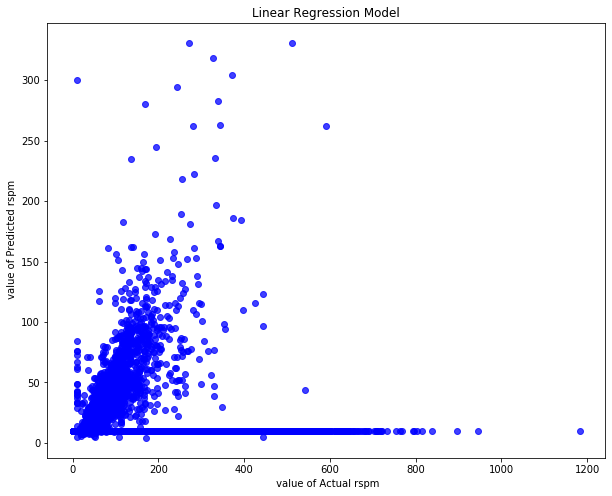

In [47]:
#view this relationship between predictions and actual_values graphically with a scatter plot.

lr_PriceArr = np.array(lr_test_results.predictions.select('rspm').collect())
lr_PredictionArr = np.array(lr_test_results.predictions.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(lr_PriceArr,lr_PredictionArr, alpha=.75,
            color='b')  # alpha helps to show overlapping data
 
plt.xlabel(' value of Actual rspm')
plt.ylabel(' value of Predicted rspm')
plt.title('Linear Regression Model')

plt.show()

In [48]:
# Random forest Regression start from here
# train RandomForest model
rf = RandomForestRegressor(labelCol="rspm", featuresCol="patterns", predictionCol = "prediction")

rf_pipeline = Pipeline(stages=[assembler, rf])
# creating the Random forest model
rf_model = rf_pipeline.fit(train_data)

In [49]:
# Useing the model on train data to view the result of the model on train data

rf_train_results = rf_model.transform(train_data)

# Let's have a look into the predictions on the traindata from model.
rf_train_results.select('rspm','prediction', 'patterns').show(10)


rf_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "r2"}))

+----+------------------+--------------------+
|rspm|        prediction|            patterns|
+----+------------------+--------------------+
|  10|60.310873096334625|(50,[7,11,12,13,1...|
|  10|60.310873096334625|(50,[7,11,12,13,1...|
|  10| 68.22630642880836|(50,[7,11,12,13,1...|
|  10|60.310873096334625|(50,[0,7,11,12,13...|
|  10|60.310873096334625|(50,[0,7,11,12,13...|
|  10|60.310873096334625|(50,[0,7,11,12,13...|
|  10|60.310873096334625|(50,[0,7,11,12,13...|
|  10|60.310873096334625|(50,[0,7,11,12,13...|
|  10| 68.22630642880836|(50,[0,7,11,12,13...|
|  10| 48.18190591454079|(50,[0,7,11,12,13...|
+----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 43.7889
Mean Squared Error (mse) on train data = 3975.46
Root Mean Squared Error (rmse) on train data = 63.0512
R Squared (R2) on train data = 0.333142


In [50]:
# Make predictions on test data
rf_test_results = rf_model.transform(test_data)

# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_test_results.select('rspm','prediction', 'patterns').show(10)



rf_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "r2"}))

+----+------------------+--------------------+
|rspm|        prediction|            patterns|
+----+------------------+--------------------+
|  10|60.310873096334625|(50,[0,7,11,12,13...|
|  10| 68.22630642880836|(50,[0,7,11,12,13...|
|  10| 51.60299239928757|(50,[0,7,11,12,13...|
|  10| 68.22630642880836|(50,[0,7,11,12,13...|
|  10| 70.47451485728803|(50,[0,7,11,12,13...|
|  58| 71.35355327433157|(50,[0,1,11,12,13...|
|  16| 73.27310648761798|(50,[0,1,11,12,13...|
|  20| 73.27310648761798|(50,[0,2,11,12,13...|
|  22| 73.27310648761798|(50,[0,1,11,12,13...|
|  25| 73.27310648761798|(50,[0,1,11,12,13...|
+----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 43.8633
Mean Squared Error (mse) on test data = 3809.86
Root Mean Squared Error (rmse) on test data = 61.7241
R Squared (R2) on test data = 0.340393


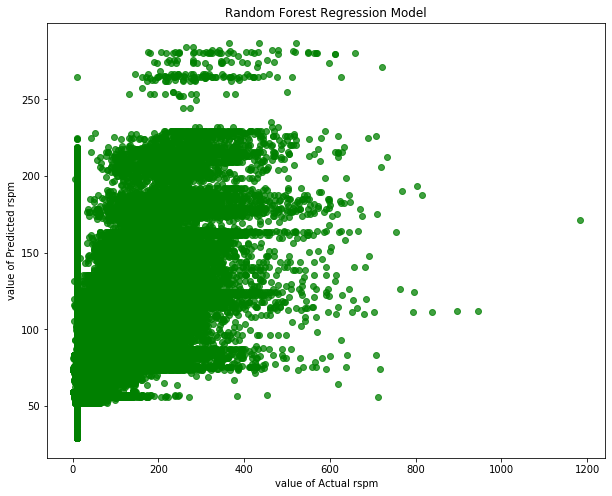

In [51]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_PriceArr = np.array(rf_test_results.select('rspm').collect())
rf_PredictionArr = np.array(rf_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_PriceArr,rf_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('value of Actual rspm')
plt.ylabel('value of Predicted rspm')
plt.title('Random Forest Regression Model')

plt.show()

In [52]:
# Evaluate model
rf_cv_evaluator = RegressionEvaluator(metricName="rmse", labelCol=rf.getLabelCol(), predictionCol=rf.getPredictionCol())

# Create ParamGrid for Cross Validation
rf_paramGrid = (ParamGridBuilder()
             #.addGrid(rf.maxDepth, [2, 5, 10, 20, 30])
               .addGrid(rf.maxDepth, [2, 5])
             #.addGrid(rf.maxBins, [10, 20, 40, 80, 100])
               .addGrid(rf.maxBins, [10, 20, 40])
             #.addGrid(rf.numTrees, [5, 20, 50, 100, 500])
               .addGrid(rf.numTrees, [10, 100])
             .build())

# Create 5-fold CrossValidator
rf_cv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rf_paramGrid,
                      evaluator = rf_cv_evaluator,
                      numFolds = 5)
# creating the pipeline with cross validator and features
rf_cv_pipeline = Pipeline(stages=[assembler, rf_cv])

In [53]:
# creating the pipeline with cross validator and features
rf_cv_pipeline = Pipeline(stages=[assembler, rf_cv])

# fitting the train data 
rf_cv_pipelineModel = rf_cv_pipeline.fit(train_data)

In [54]:
# Useing the model on train data to view the result of the model on train data

rf_cv_train_results = rf_cv_pipelineModel.transform(train_data)

# Let's have a look into the predictions on the traindata from model.
rf_cv_train_results.select('rspm','prediction', 'patterns').show(10)


rf_cv_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "r2"}))

+----+-----------------+--------------------+
|rspm|       prediction|            patterns|
+----+-----------------+--------------------+
|  10|57.24091893125527|(50,[7,11,12,13,1...|
|  10|57.24091893125527|(50,[7,11,12,13,1...|
|  10|67.19508879191008|(50,[7,11,12,13,1...|
|  10|57.24091893125527|(50,[0,7,11,12,13...|
|  10|57.24091893125527|(50,[0,7,11,12,13...|
|  10|57.24091893125527|(50,[0,7,11,12,13...|
|  10|58.08455699486715|(50,[0,7,11,12,13...|
|  10|58.08455699486715|(50,[0,7,11,12,13...|
|  10|67.19508879191008|(50,[0,7,11,12,13...|
|  10|51.80136997411803|(50,[0,7,11,12,13...|
+----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 43.6155
Mean Squared Error (mse) on train data = 3939.1
Root Mean Squared Error (rmse) on train data = 62.7622
R Squared (R2) on train data = 0.33924


In [55]:
# Use test set here so we can measure the accuracy of our model on new data

rf_cv_test_results = rf_cv_pipelineModel.transform(test_data)


# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_cv_test_results.select('rspm','prediction', 'patterns').show(10)


rf_cv_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "r2"}))

+----+------------------+--------------------+
|rspm|        prediction|            patterns|
+----+------------------+--------------------+
|  10| 57.24091893125527|(50,[0,7,11,12,13...|
|  10| 67.19508879191008|(50,[0,7,11,12,13...|
|  10| 56.22057059488971|(50,[0,7,11,12,13...|
|  10| 67.19508879191008|(50,[0,7,11,12,13...|
|  10|59.217027848438555|(50,[0,7,11,12,13...|
|  58| 72.70613538050992|(50,[0,1,11,12,13...|
|  16| 70.76975317558713|(50,[0,1,11,12,13...|
|  20| 71.16285545520851|(50,[0,2,11,12,13...|
|  22| 70.76975317558713|(50,[0,1,11,12,13...|
|  25| 70.76975317558713|(50,[0,1,11,12,13...|
+----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 43.6706
Mean Squared Error (mse) on test data = 3770.11
Root Mean Squared Error (rmse) on test data = 61.4012
R Squared (R2) on test data = 0.347276


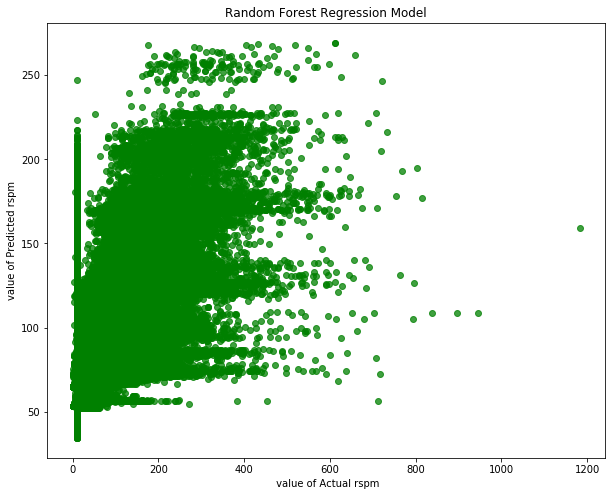

In [56]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_cv_PriceArr = np.array(rf_cv_test_results.select('rspm').collect())
rf_cv_PredictionArr = np.array(rf_cv_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_cv_PriceArr,rf_cv_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel(' value of Actual rspm')
plt.ylabel('value of Predicted rspm')
plt.title('Random Forest Regression Model')

plt.show()

In [58]:
#Greadint Boosting
# train RandomForest model
gbr = GBTRegressor(labelCol="rspm", featuresCol="patterns", predictionCol = "prediction")

gbr_pipeline = Pipeline(stages=[assembler, gbr])

In [59]:
#Creating the model for Gradient Boosting Tree Regression

gbr_model = gbr_pipeline.fit(train_data)
# Useing the model on train data to view the result of the model on train data

gbr_train_results = gbr_model.transform(train_data)

# Let's have a look into the predictions on the traindata from model.
gbr_train_results.select('rspm','prediction', 'patterns').show(10)


gbr_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator.metricName: "r2"}))

+----+------------------+--------------------+
|rspm|        prediction|            patterns|
+----+------------------+--------------------+
|  10| 12.95439000779237|(50,[7,11,12,13,1...|
|  10| 12.95439000779237|(50,[7,11,12,13,1...|
|  10|20.615925663742534|(50,[7,11,12,13,1...|
|  10| 12.95439000779237|(50,[0,7,11,12,13...|
|  10| 12.95439000779237|(50,[0,7,11,12,13...|
|  10| 12.95439000779237|(50,[0,7,11,12,13...|
|  10|14.047447446990336|(50,[0,7,11,12,13...|
|  10|14.047447446990336|(50,[0,7,11,12,13...|
|  10|20.615925663742534|(50,[0,7,11,12,13...|
|  10|10.804740212119913|(50,[0,7,11,12,13...|
+----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 38.3059
Mean Squared Error (mse) on train data = 3297.19
Root Mean Squared Error (rmse) on train data = 57.4212
R Squared (R2) on train data = 0.446917


In [60]:
# Make predictions on test data
gbr_test_results = gbr_model.transform(test_data)

# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_test_results.select('rspm','prediction', 'patterns').show(10)


gbr_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "r2"}))

+----+------------------+--------------------+
|rspm|        prediction|            patterns|
+----+------------------+--------------------+
|  10| 12.95439000779237|(50,[0,7,11,12,13...|
|  10|20.615925663742534|(50,[0,7,11,12,13...|
|  10|11.407900718160928|(50,[0,7,11,12,13...|
|  10|20.615925663742534|(50,[0,7,11,12,13...|
|  10|1.1030226677063042|(50,[0,7,11,12,13...|
|  58| 65.82891530141845|(50,[0,1,11,12,13...|
|  16|59.133455641807956|(50,[0,1,11,12,13...|
|  20| 62.61155083190131|(50,[0,2,11,12,13...|
|  22|59.133455641807956|(50,[0,1,11,12,13...|
|  25|59.133455641807956|(50,[0,1,11,12,13...|
+----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 38.3772
Mean Squared Error (mse) on test data = 3134.36
Root Mean Squared Error (rmse) on test data = 55.9854
R Squared (R2) on test data = 0.457344


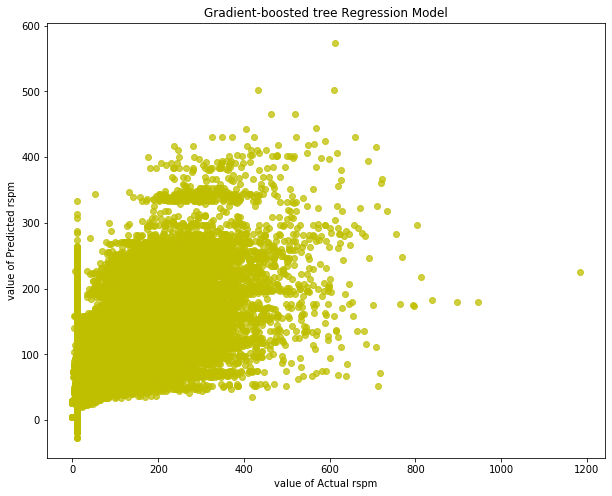

In [61]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_PriceArr = np.array(gbr_test_results.select('rspm').collect())
gbr_PredictionArr = np.array(gbr_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_PriceArr,gbr_PredictionArr, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('value of Actual rspm')
plt.ylabel('value of Predicted rspm')
plt.title('Gradient-boosted tree Regression Model')

plt.show()

In [62]:
# Define a grid of hyperparameters to test:
#  - maxDepth: max depth of each decision tree in the GBT ensemble
#  - maxIter: iterations, i.e., number of trees in each GBT ensemble
# In this example notebook, we keep these values small.
#In practice, to get the highest accuracy, we would likely want to try deeper trees (10 or higher) and 
#more trees in the ensemble (>100).
gbr_paramGrid = ParamGridBuilder()\
  .addGrid(gbr.maxDepth, [2, 5])\
  .addGrid(gbr.maxIter, [10, 100])\
  .build()
# We define an evaluation metric.  
#This tells CrossValidator how well we are doing by comparing the true labels with predictions.
gbr_cv_evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbr.getLabelCol(), predictionCol=gbr.getPredictionCol())
# Declare the CrossValidator, which runs model tuning for us.
gbr_cv = CrossValidator(estimator=gbr, evaluator=gbr_cv_evaluator, estimatorParamMaps=gbr_paramGrid)

In [63]:
#creating pipeline with the features and model
gbr_cv_pipeline = Pipeline(stages=[assembler, gbr_cv])

# fitting the train data and transforming the test data

gbr_cv_pipelineModel = gbr_cv_pipeline.fit(train_data)

In [64]:
# Useing the model on train data to view the result of the model on train data

gbr_cv_train_results = gbr_cv_pipelineModel.transform(train_data)

gbr_cv_train_results.select('rspm','prediction', 'patterns').show(10)


gbr_cv_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator.metricName: "r2"}))

+----+------------------+--------------------+
|rspm|        prediction|            patterns|
+----+------------------+--------------------+
|  10|  4.38223060572096|(50,[7,11,12,13,1...|
|  10|  4.38223060572096|(50,[7,11,12,13,1...|
|  10| 8.523024693983638|(50,[7,11,12,13,1...|
|  10|  4.38223060572096|(50,[0,7,11,12,13...|
|  10|  4.38223060572096|(50,[0,7,11,12,13...|
|  10|  4.38223060572096|(50,[0,7,11,12,13...|
|  10| 6.051006664878672|(50,[0,7,11,12,13...|
|  10| 6.051006664878672|(50,[0,7,11,12,13...|
|  10| 8.912433755086488|(50,[0,7,11,12,13...|
|  10|1.8023345700096045|(50,[0,7,11,12,13...|
+----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 33.4489
Mean Squared Error (mse) on train data = 2712.16
Root Mean Squared Error (rmse) on train data = 52.0784
R Squared (R2) on train data = 0.545052


In [65]:
# using the model to get prediction on test data
gbr_cv_test_results = gbr_cv_pipelineModel.transform(test_data)


# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_cv_test_results.select('rspm','prediction', 'patterns').show(10)

gbr_cv_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "r2"}))

+----+-------------------+--------------------+
|rspm|         prediction|            patterns|
+----+-------------------+--------------------+
|  10|   4.38223060572096|(50,[0,7,11,12,13...|
|  10|  8.523024693983638|(50,[0,7,11,12,13...|
|  10|-0.9706245995831128|(50,[0,7,11,12,13...|
|  10|  8.912433755086488|(50,[0,7,11,12,13...|
|  10|-11.867683703703989|(50,[0,7,11,12,13...|
|  58|   52.7444465526962|(50,[0,1,11,12,13...|
|  16|  54.18874900813513|(50,[0,1,11,12,13...|
|  20|  56.31679944925009|(50,[0,2,11,12,13...|
|  22|  54.18874900813513|(50,[0,1,11,12,13...|
|  25|  54.18874900813513|(50,[0,1,11,12,13...|
+----+-------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 33.7125
Mean Squared Error (mse) on test data = 2587.42
Root Mean Squared Error (rmse) on test data = 50.8667
R Squared (R2) on test data = 0.552037


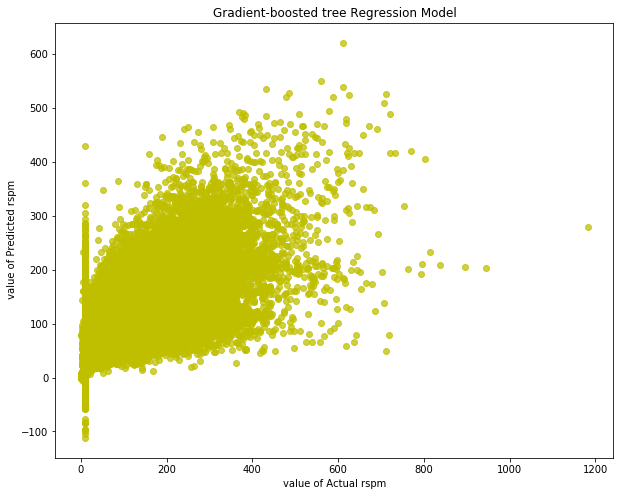

In [66]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_cv_PriceArr = np.array(gbr_cv_test_results.select('rspm').collect())
gbr_cv_PredictionArr = np.array(gbr_cv_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_cv_PriceArr,gbr_cv_PredictionArr, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('value of Actual rspm')
plt.ylabel(' value of Predicted rspm')
plt.title('Gradient-boosted tree Regression Model')

plt.show()